In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Texts preprocessing

In [ ]:
!pip install gensim
!pip install -U pip setuptools wheel
!pip install -U spacy

In [ ]:
import re
import gensim
import glob
import nltk

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

## Разделение текста на фрагменты

In [ ]:
# Uniting all texts in one txt file for further bot training
all_texts_en = glob.glob('/content/drive/MyDrive/eng/*.txt') 
with open('/content/drive/MyDrive/all_text_en.txt', 'w') as outfile:
      for fname in all_texts_en:
        with open(fname) as infile:
          for text in infile:
            outfile.write('\n'+text)

all_texts_deu = glob.glob('/content/drive/MyDrive/deu/*.txt') 
with open('/content/drive/MyDrive/all_text_deu.txt', 'w') as outfile:
      for fname in all_texts_deu:
        with open(fname) as infile:
          for text in infile:
            outfile.write('\n'+text)         

In [ ]:
def make_pieces(file_path, output_path):
     with open(file_path, 'r') as file:
         text = file.read()
         piece_num = 0
         i = 0
         while i < len(text):
            text_piece = text[i:i+9500]
            j = 1
            while text_piece[-j] != ' ':
                j+=1

            i+=10000
            i-= j
            print(i, len(text), text_piece[j])
            
            with open(output_path + file_path[-8:-4]+'_piece'+str(piece_num)+'.txt', 'w') as output_file:
              output_file.write(text_piece[:-j])
            piece_num+= 1
            print(piece_num)

In [ ]:
file_list = glob.glob('/content/drive/MyDrive/de1/*.txt') 

In [ ]:
for i in range(len(file_list)):
  for path in file_list[i:]:
    make_pieces(path, '/content/drive/MyDrive/deu/')

In [ ]:
#Quantity of English texts
file_list_en = glob.glob('/content/drive/MyDrive/eng/*.txt') 
len(file_list_en)

10134

In [ ]:
#Quantity of German texts
file_list_de = glob.glob('/content/drive/MyDrive/deu/*.txt') 
len(file_list_de)

10227

Texts preprocessing

## Обработка английских текстов

In [ ]:
!spacy download en_core_web_lg

In [ ]:
import en_core_web_lg

In [ ]:
#Defining stop words
stop_words = set(stopwords.words('english')) 
 
stop_words.update(['though', 'other', 'towards', 'due', 'within', 'per', 'oh', 'besides', 'willy']) 

In [ ]:
def decontracted(phrase):
  
    phrase = re.sub(r"won['’‘`]t", "will not", phrase)
    phrase = re.sub(r"can['’‘`]t", "can not", phrase)
    phrase = re.sub(r"ain['’‘`]t", "am not", phrase)
    phrase = re.sub(r"n['’‘`]t", " not", phrase)
    phrase = re.sub(r"['’‘`]re", " are", phrase)
    phrase = re.sub(r"['’‘`]s", " is", phrase)
    phrase = re.sub(r"['’‘`]d", " would", phrase)
    phrase = re.sub(r"['’‘`]ll", " will", phrase)
    phrase = re.sub(r"['’‘`]t", " not", phrase)
    phrase = re.sub(r"['’‘`]ve", " have", phrase)
    phrase = re.sub(r"['’‘`]m", " am", phrase)
    phrase = re.sub(r'[^\w.?!;]', ' ', phrase)
    phrase = re.sub(' +', ' ', phrase)
    phrase =  re.sub('[^a-zA-Z]+', ' ', phrase)
    phrase = phrase.lower()

    sentences = re.split('([.;!?] *)', phrase)

    return ' '.join([i.capitalize() for i in  sentences])

In [ ]:
def prepare_english_text(input_path, output_path, nlp):
    nlp = en_core_web_lg.load(disable=['parser'])
    nlp.max_length = 5000000
    pos_dict = {'PROPN': 'PERSON', 'PRON': 'PRON', 'NUM': 'ORDINAL1'}
    file_name =  input_path.split('/')[-1]
    try:
        with open(input_path, 'r') as lit_text:
            raw_text = lit_text.read()
    except Exception as ex:
        return
    space = re.compile('[\s]+')
    line = re.compile(r'\n')
    regex = re.compile('[a-zA-Z]+')
    preprocessed_text = decontracted(raw_text)
    
    nlp_doc = nlp(preprocessed_text)
    sorted_ents = sorted(nlp_doc.ents, key = lambda x: len(x), reverse =  True)

    for ent in sorted_ents:
        preprocessed_text = preprocessed_text.replace(' ' + ent.text + ' ', ' ' + ent.label_+ '1 ')
        if not ent.text.islower():
            preprocessed_text = preprocessed_text.replace(' ' + ent.text.lower() + ' ', ' ' + ent.label_+ '1 ')

    new_nlp_doc = nlp(preprocessed_text)

    with open(output_path + file_name, 'w') as prepared_text:
        for token in new_nlp_doc:
            if (token.text.lower() in stop_words) or (len(token.text) == 1)   \
            or (token.pos_ == 'PRON') or (token.ent_type_ == 'PROPN') \
            or (space.match(token.text) != None) or (line.match(token.text) != None):
              continue
                
            if token.pos_ in pos_dict and regex.match(token.text) != None:
                    prepared_text.write(pos_dict[token.pos_])
                    prepared_text.write(' ')
                    
            elif token.pos_ != 'PUNCT':
                    prepared_text.write(token.lemma_.lower())
                    prepared_text.write(' ')

            else:
                prepared_text.write(token.text)
                prepared_text.write(' ')


In [ ]:
nlp = en_core_web_lg.load(disable=['parser'])
nlp.max_length = 5000000

In [ ]:
en_file_list = glob.glob('/content/drive/MyDrive/bot_en/*.txt') 

for path in en_file_list:
    print(path)
    prepare_english_text(path, '/content/drive/MyDrive/new_eng_bot/', nlp)

In [ ]:
#Writing all preprocessed texts in one txt file
prep_en_file_list = glob.glob('/content/drive/MyDrive/new_eng_bot/*.txt') 

with open('/content/drive/MyDrive/en_bot_prepared.txt', 'w') as outfile:
    for fname in prep_en_file_list:
        with open(fname) as infile:
          for text in infile:
            outfile.write('\n'+text)

In [ ]:
# Quantity of words check for preprocessed human written texts
file = open("/content/drive/MyDrive/en_prepared.txt", "rt") 
data = file.read() 
words = data.split() 
print('Number of words in text file :', len(words))
file.close()

Number of words in text file : 8156552


In [ ]:
# Quantity of words check for preprocessed bot written texts
file = open("/content/drive/MyDrive/en_bot_prepared.txt", "rt") 
data = file.read() 
words = data.split() 
print('Number of words in text file :', len(words))
file.close()

Number of words in text file : 7621185


The quantity of words varies because TextGen bot had generated texts containing more words that were deleted during preprocessing (for example: and, of, the, etc). 

The number of words for all uncleaned human written texts was  17495998 and initially texts of the same amount were generated by the bot. 

However, after preprocessing, the number of words in bot texts had decreased rapidly comparing with human written texts. That's why I have generated texts of longer size in order to make cleaned texts more or less equal. 

Overall, the amount of words in uncleaned bot texts was 18776512. 

## Обработка немецких текстов

In [ ]:
!spacy download de_core_news_md

In [ ]:
import de_core_news_md

In [ ]:
# Creating the list of stop words
stop_words = set(stopwords.words('german')) 
 
stop_words.update(['besonders', 'oh', 'auch', 'damit', 'gern', 'ab', 'beispiel', 'früher', 'muß', 'niemand']) 

In [ ]:
def decontracted(phrase):
    
    phrase = re.sub(r'[^\w.?!;]', ' ', phrase)
    phrase = re.sub(' +', ' ', phrase)
    phrase =  re.sub('[^a-zA-Z_ÄäÖöÜüß]+', ' ', phrase)
    phrase = phrase.lower()
    sentences = re.split('([.;!?] *)', phrase)

    return ' '.join([i.capitalize() for i in  sentences])

In [ ]:
def prepare_german_text(input_path, output_path, nlp):
    nlp = de_core_news_md.load(disable=['parser'])
    nlp.max_length = 5000000
    pos_dict = {'PROPN': 'PERSON', 'PRON': 'PRON', 'NUM': 'ORDINAL1'}
    file_name =  input_path.split('/')[-1]
    try:
        with open(input_path, 'r') as lit_text:
            raw_text = lit_text.read()
    except Exception as ex:
        return
    space = re.compile('[\s]+')
    line = re.compile(r'\n')
    regex = re.compile('[a-zA-Z_ÄäÖöÜüß]+')
    preprocessed_text = decontracted(raw_text)
    
    nlp_doc = nlp(preprocessed_text)
    sorted_ents = sorted(nlp_doc.ents, key = lambda x: len(x), reverse =  True)

    for ent in sorted_ents:
        preprocessed_text = preprocessed_text.replace(' ' + ent.text + ' ', ' ' + ent.label_+ '1 ')
        if not ent.text.islower():
            preprocessed_text = preprocessed_text.replace(' ' + ent.text.lower() + ' ', ' ' + ent.label_+ '1 ')

    new_nlp_doc = nlp(preprocessed_text)

    with open(output_path + file_name, 'w') as prepared_text:
        for token in new_nlp_doc:
            if (token.text.lower() in stop_words) or (len(token.text) == 1)   \
            or (token.pos_ == 'PRON') or (token.ent_type_ == 'PROPN') \
            or (space.match(token.text) != None) or (line.match(token.text) != None):
              continue
                
            if token.pos_ in pos_dict and regex.match(token.text) != None:
                    prepared_text.write(pos_dict[token.pos_])
                    prepared_text.write(' ')
                    
            elif token.pos_ != 'PUNCT':
                    prepared_text.write(token.lemma_.lower())
                    prepared_text.write(' ')

            else:
                prepared_text.write(token.text)
                prepared_text.write(' ')

In [ ]:
nlp = de_core_news_md.load(disable=['parser'])
nlp.max_length = 5000000

In [ ]:
deu_file_list = glob.glob('/content/drive/MyDrive/bot_deu/*.txt') 

for path in deu_file_list:
    print(path)
    prepare_german_text(path, '/content/drive/MyDrive/new_deu_bot/', nlp)

In [ ]:
# Writing all texts in one txt file
prep_deu_file_list = glob.glob('/content/drive/MyDrive/new_deu_bot/*.txt') 

with open('/content/drive/MyDrive/deu_bot_prepared.txt', 'w') as outfile:
      for fname in prep_deu_file_list:
        with open(fname) as infile:
          for text in infile:
            outfile.write('\n'+text)

In [ ]:
# Quantity of words check for human written texts
file = open("/content/drive/MyDrive/deu_prepared.txt", "rt") 
data = file.read() 
words = data.split() 
print('Number of words in text file :', len(words))
file.close()

Number of words in text file : 5320371


In [ ]:
# Quantity of words check for bot written texts
file = open("/content/drive/MyDrive/deu_bot_prepared.txt", "rt") 
data = file.read() 
words = data.split() 
print('Number of words in text file :', len(words))
file.close()

Number of words in text file : 5176465


Quantity of words slightly varies because the bot had generated texts containing more words that were deleted during preprocessing (like und, der, die, etc)

# Creating TF-IDF matrix and dictionary


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
stop_words1=['a', 'aa', 'aal', 'aale', 'ac', 'abc', 'ab','abattis', 'abatis', 'abbazia', 'abe', 'ade', 'adieu', 
             'adieus', 'adieux', 'adze', 'aedile', 'aegeria', 'aegina', 'aegritudine', 'aegro', 'aeolian', 'aelianus',
             'aenea', 'aeon', 'aeque', 'aere', 'aerenthal', 'aetas', 'aetius', 'af', 'ah', 'aie', 'aha', 'ai', 'algarotti',
             'an', 'ao', 'au', 'av', 'ave', 'aw', 'ay', 'appx', 'apr', 'xiv', 'ba', 'baa', 'bah', 'batteaux', 'bb', 'bd', 'be', 'bh', 
             'bk', 'bl', 'bonjour', 'br', 'ca', 'cf', 'ch', 'cm', 'co', 'ct', 'ctesia', 'cujusque', 'cwt', 'deux',   
             'zo', 'zu', 'ysk', 'yo', 'yd', 'zum', 'zur', 'zo', 'y', 'xi', 'wski', 'wu', 'wuk', 'wus', 'wuss', 'xl', 'xli',
             'xlix', 'ii', 'iv', 'je', 'jeu', 'kr', 'la', 'ku', 'lb', 'na', 'rd', 're', 't', 'ta', 'te', 'ths', 'ts', 'tten',
             'txt','ty', 'lbs', 'lx', 'lv', 'sa', 'ld', 'le', 'in', 'cieux', 'mieux', 'taedium', 'saepe', 'quae', 'oui', 'si', 
             'uh', 'quaeritur', 'quaest', 'pp', 'pr', 'laelius', 'laerte', 'oi', 'on', 'oo', 'laertius', 'laesae', 'lactantius',
             'est', 'esti', 'ph', 'pt', 'esta', 'oe','em', 'en', 'eo', 'es','istis', 'ls', 'pp', 'pr', 'lsung', 'lt', 'manque', 
             'ms', 'mss', 'nbrunn', 'nd', 'o', 'nder', 'ndly', 'ne', 'quo', 'quocunque','quod', 'quodque','quoi','quoin','quoit', 
             'quomodo','quoniam','quoque','quos','quotha', 'quum', 'qwati', 'r', 'wh', 'wha', 'x', 'you', 'your', 'ze', 'vi', 'vgl']

In [ ]:
def make_table_and_dict(corpus_path, min_df, max_df, token_pattern = None, use_idf = True):
    with open(corpus_path, 'r') as corpus_file:
        if token_pattern:
            vectorizer = TfidfVectorizer(analyzer='word', min_df=min_df, token_pattern=token_pattern, use_idf=use_idf, stop_words=stop_words1)
        else:
            vectorizer = TfidfVectorizer(analyzer='word', min_df=min_df)
        data_vectorized = vectorizer.fit_transform(corpus_file)
    return data_vectorized, vectorizer.get_feature_names(), vectorizer.idf_

In [ ]:
# Creating vectors and a dictionary for English prepared texts
eng_data_vectorized, eng_dictionary, idfs = make_table_and_dict('/content/drive/MyDrive/en_prepared.txt', 3,  0.8 ,'[A-Za-z]+')
pairs_en = dict(zip(eng_dictionary, idfs))

In [ ]:
with open('/content/drive/MyDrive/en_dict.txt', 'w') as output_file:
    for word in eng_dictionary:
        if (pairs_en[word] > 1):
            output_file.write(word)
            output_file.write('\n')
        else:
            print('here')

In [ ]:
pairs_en = list(zip(eng_dictionary, idfs))
sorted(pairs_en, key = lambda x: x[1])

In [ ]:
# Creating vectors and a dictionary for German prepared texts
deu_data_vectorized, deu_dictionary, idfs_d = make_table_and_dict('/content/drive/MyDrive/deu_prepared.txt', 3,  0.8 ,'[a-zA-Z_ÄäÖöÜüß]+')
pairs_de = dict(zip(deu_dictionary, idfs_d))

In [ ]:
with open('/content/drive/MyDrive/de_dict.txt', 'w') as output_file:
    for word in deu_dictionary:
        if (pairs_de[word] > 1):
            output_file.write(word)
            output_file.write('\n')
        else:
            print('here')

here


In [ ]:
pairs_de = list(zip(deu_dictionary, idfs_d))
sorted(pairs_de, key = lambda x: x[1])

# SVD decomposition of TF-IDF matrix

In [ ]:
from scipy.sparse.linalg import svds
import numpy as np

In [ ]:
u, sigma, vt = svds(eng_data_vectorized, 10)
vt[:,1]

array([-2.64711443e-04, -5.07930481e-04,  1.52991135e-04,  8.20936180e-05,
        1.83822876e-04,  2.73327857e-04,  2.31543397e-04,  5.09476405e-04,
        8.02817227e-05, -3.49378364e-05])

In [ ]:
def create_tables(data_vectorized, k_range, name):
    for k in k_range:
        u, sigma, vt = svds(data_vectorized, k)
        with open('/content/drive/MyDrive/SVD/' + name + str(k) + '.npy', 'wb') as f:
            np.save(f, np.dot(np.diag(sigma), vt).T)

In [ ]:
def create_table(data_vectorized, k, name):
    u, sigma, vt = svds(data_vectorized, k)
    print(sigma)
    with open('/content/drive/MyDrive/SVD/' + name + str(k) + '.npy', 'wb') as f:
        np.save(f, np.dot(np.diag(sigma), vt).T)

### Creating dictionary for English

In [ ]:
# SVD decompositon of English vectorized data
create_table(eng_data_vectorized, 10133, 'en_sigma_v')

[ 0.          0.          0.         ...  9.85362595 12.50415883
 53.65009482]


In [ ]:
table = np.load('/content/drive/MyDrive/SVD/en_sigma_v10133.npy')

In [ ]:
table.shape

(36215, 10133)

In [ ]:
#Creating dictionary
dic_eng = dict()

for i in range(len(eng_dictionary)):
  dic_eng[eng_dictionary[i]] = table[i]

with open('/content/drive/MyDrive/SVD/dic_eng.npy', 'wb') as f:
        np.save(f, dic_eng) 

### Creating dictionary for German

In [ ]:
min(deu_data_vectorized.shape)

10227

In [ ]:
# SVD decompositon of German vectorized data
create_table(deu_data_vectorized, 10226, 'de_sigma_v')

[ 0.          0.          0.         ...  7.73217316 10.71259988
 34.68116271]


In [ ]:
table1 = np.load('/content/drive/MyDrive/SVD/de_sigma_v10226.npy')

In [ ]:
table1.shape

(61670, 10226)

In [ ]:
#Creating dictionary
dic_deu = dict()

for i in range(len(deu_dictionary)):
  dic_deu[deu_dictionary[i]] = table1[i]

with open('/content/drive/MyDrive/SVD/dic_deu.npy', 'wb') as f:
        np.save(f, dic_deu)

# Creating dataset

## Creating Ngrams

In [ ]:
from nltk.util import ngrams

For Ngram generating nltk module was used. Ngrams of length 2 were created for human written prepared texts.

### For English

In [ ]:
with open('/content/drive/MyDrive/en_bot_prepared.txt', 'r') as file:
         text = file.read()
         text = text.lower()
         text = re.sub(r'[^a-zA-Z\s]', ' ', text)
         tokens = [token for token in text.split(" ") if token != ""]
         output = set(ngrams(tokens, 2))
         print(output)
         print(len(output))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(output)

3380864

In [ ]:
with open('/content/drive/MyDrive/SVD/ngram_b_en.npy', 'wb') as f:
        np.save(f, output)

### For German

In [ ]:
with open('/content/drive/MyDrive/deu_prepared.txt', 'r') as file:
         text = file.read()
         text = text.lower()
         text = re.sub(r'[^a-zA-Z_ÄäÖöÜüß\s]', ' ', text)
         tokens = [token for token in text.split(" ") if token != ""]
         output = set(ngrams(tokens, 2))
         print(output)
         print(len(output))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(output)

2977022

In [ ]:
with open('/content/drive/MyDrive/SVD/ngram_deu.npy', 'wb') as f:
        np.save(f, output)

## Dataset 

In [ ]:
import numpy as np

In [ ]:
en_dictionary = np.load('/content/drive/MyDrive/SVD/dic_eng.npy', allow_pickle=True)

In [ ]:
deu_dictionary = np.load('/content/drive/MyDrive/SVD/dic_deu.npy', allow_pickle=True)

In [ ]:
# Function for creating a dataset of contactenating vectors for ngrams of length=2.
def dataset(inputpath, outputpath, dictionary, m):
  ngram_array = np.load(inputpath, allow_pickle=True)
  ng = ngram_array.tolist()
  ngram = list(ng)
  dictionary = dictionary.tolist()
  #lables = []
  dataset = []
  for i in ngram:
    if (i[0] in dictionary.keys()) and (i[1] in dictionary.keys()):
      vector = dictionary[i[0]][:m]+dictionary[i[1]][:m]
      dataset.append(vector)
      #lables.append(i)
    else:
      continue
  with open(outputpath, 'wb') as f:
        np.save(f, dataset)



In [ ]:
dataset('/content/drive/MyDrive/SVD/ngram_en.npy','/content/drive/MyDrive/Dataset/data_en.npy', en_dictionary, 20)

In [ ]:
dataset('/content/drive/MyDrive/SVD/ngram_b_en.npy', '/content/drive/MyDrive/Dataset/data_bot_en.npy', en_dictionary, 20)

In [ ]:
dataset('/content/drive/MyDrive/SVD/ngram_deu.npy','/content/drive/MyDrive/Dataset/data_deu.npy', deu_dictionary, 20)

In [ ]:
dataset('/content/drive/MyDrive/SVD/ngram_b_deu.npy','/content/drive/MyDrive/Dataset/data_bot_deu.npy', deu_dictionary, 20)

# Clustering

 DBSCAN was chosen for clustering datasets.

It has two hyperparameter values: 

- eps : float The maximum distance between two samples for one to be considered as in the neighborhood of the other.

- min_samples : int The number of samples in a neighborhood for a point to be considered as a core point.

that have to be selected in order to produce better clustering results.

Calinski and Harabasz score was used to select the best hyperparametres for each dataset because a higher Calinski-Harabasz score relates to a model with better defined clusters.



In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random

## English human written text clustering

In [ ]:
X = np.load('/content/drive/MyDrive/data_en.npy')

In [ ]:
len(X)

3224892

In [ ]:
dim = 20
pca = PCA(n_components = dim)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:322489]) #randomly chosen 50.000 vectors for conducting an exepriment in order to choose hyperparametres
#X_scaled = scaler.fit_transform(X)
X_scaled = pca.fit_transform(X_scaled)
X_scaled = scaler.fit_transform(X_scaled)

In [ ]:
calinski_score = {}
num_unique_clust = {}
plt.figure(figsize=(16, 16))
i = 1
for min_samples in [20, 50, 100]:
    for eps in [3.5, 4.9, 5.69]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, algorithm='brute')
        clusters = dbscan.fit(X_scaled)
        plt.subplot(3, 3, i)
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters.labels_, s=15 * (clusters != -1) + 2)
        plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            eps, min_samples, (100 * np.sum(clusters.labels_ == -1) / len(X_scaled))))
        if len(np.unique(clusters.labels_)) > 1: 
          calinski_score ['eps:', eps, ", min_samples:", min_samples] =  metrics.calinski_harabasz_score(X_scaled, clusters.labels_)
          num_unique_clust['eps:', eps, ", min_samples:", min_samples] = len(np.unique(clusters.labels_))
        i += 1
max_val = max(calinski_score.values())
best_param = {k: v for k, v in calinski_score.items() if v == max_val}
print(best_param)
#print(num_unique_clust)
plt.show()

KeyboardInterrupt: ignored

<Figure size 1152x1152 with 0 Axes>

In [ ]:
calinski_score

{('eps:', 3.5, ', min_samples:', 3): 0.9574104584621684,
 ('eps:', 3.5, ', min_samples:', 6): 1.0651758846813035,
 ('eps:', 3.5, ', min_samples:', 30): 1.2863987428346964,
 ('eps:', 4.9, ', min_samples:', 3): 2.2438572996669137,
 ('eps:', 4.9, ', min_samples:', 6): 2.2438572996669137,
 ('eps:', 4.9, ', min_samples:', 30): 2.1065949322206388,
 ('eps:', 5.69, ', min_samples:', 3): 3.5130507324571214,
 ('eps:', 5.69, ', min_samples:', 6): 3.5130507324571214,
 ('eps:', 5.69, ', min_samples:', 30): 3.5130507324571214}

In [ ]:
num_unique_clust

{('eps:', 3.5, ', min_samples:', 3): 2,
 ('eps:', 3.5, ', min_samples:', 6): 2,
 ('eps:', 3.5, ', min_samples:', 30): 2,
 ('eps:', 4.9, ', min_samples:', 3): 2,
 ('eps:', 4.9, ', min_samples:', 6): 2,
 ('eps:', 4.9, ', min_samples:', 30): 2,
 ('eps:', 5.69, ', min_samples:', 3): 2,
 ('eps:', 5.69, ', min_samples:', 6): 2,
 ('eps:', 5.69, ', min_samples:', 30): 2}

Number of clusters = 2
Calinski-Harabasz score for the whole dataset = 14.590767121944188
DB score for the whole dataset = 113.51616354553866


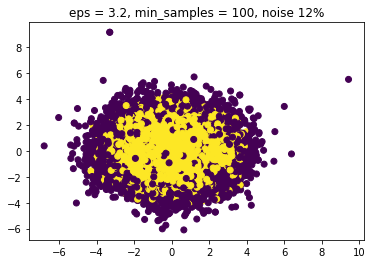

In [ ]:
dbscan1 = DBSCAN(eps=3.5, min_samples=600, metric='euclidean', algorithm='brute')
clustering1 = dbscan1.fit(X_scaled)
#with open('/content/drive/MyDrive/Dataset/en_labels2.npy', 'wb') as f:
        #np.save(f, clustering1.labels_)
print("Number of clusters =", len(np.unique(clustering1.labels_)))
print('Calinski-Harabasz score for the whole dataset =', metrics.calinski_harabasz_score(X_scaled, clustering1.labels_))
print('DB score for the whole dataset =', metrics.davies_bouldin_score(X_scaled, clustering1.labels_))
plt.scatter(x= X_scaled[:,0], y= X_scaled[:,1], c=clustering1.labels_)
plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            3.2, 100, (100 * np.sum(clustering1.labels_ == -1) / len(X_scaled))))
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
ns=100
neighbors = 100
# X_embedded is your data
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distance_desc = sorted(distances[:,ns-1], reverse=True)
#px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure

In [ ]:
kneedle.elbow

762

In [ ]:
kneedle.knee 

762

In [ ]:
kneedle.knee_y   # the optimum value for  ϵ

6.402305155968402

## English bot written text clustering

In [ ]:
X = np.load('/content/drive/MyDrive/Dataset/data_bot_en.npy')

In [ ]:
dim = 20
pca = PCA(n_components = dim)
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(random.choices(X, k=50000)) #randomly chosen 50.000 vectors for conducting an exepriment in order to choose hyperparametres
X_scaled = scaler.fit_transform(X)
X_scaled = pca.fit_transform(X_scaled)
X_scaled = scaler.fit_transform(X_scaled)

{('eps:', 3, ', min_samples:', 100): 152.5994420282724}


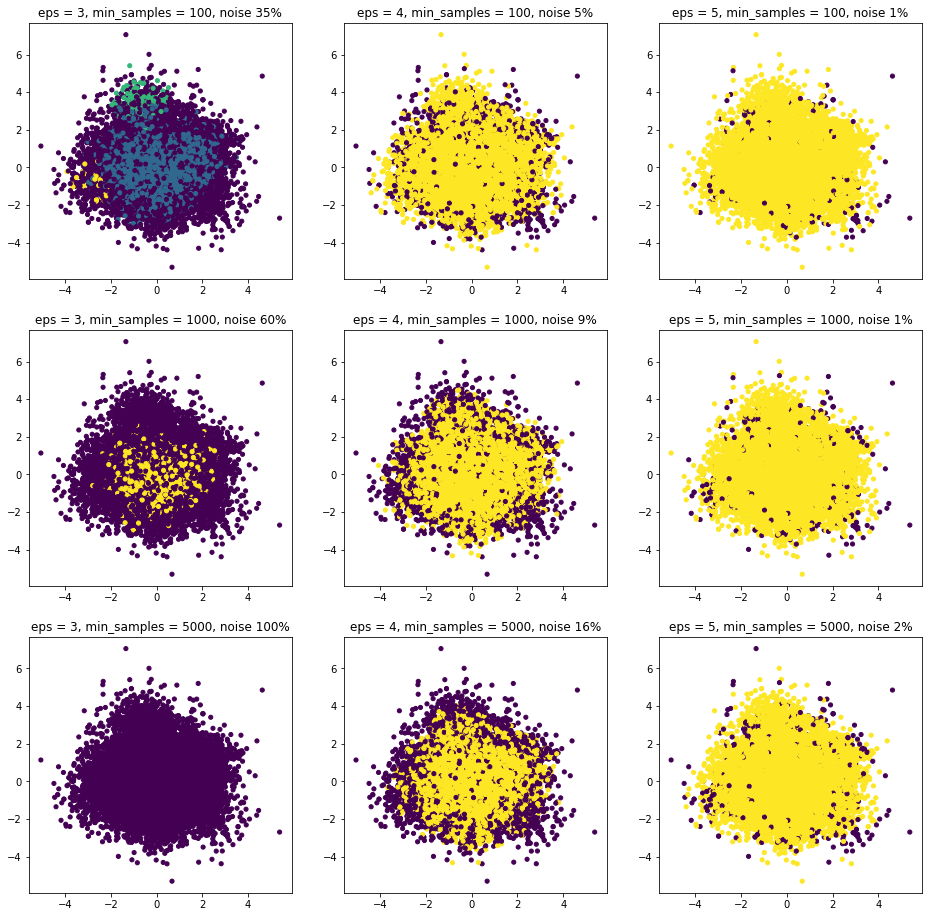

In [ ]:
calinski_score = {}
num_unique_clust = {}
plt.figure(figsize=(16, 16))
i = 1
for min_samples in [100, 1000, 5000]:
    for eps in [3, 4, 5]:                #other epsilons in range 1-12 were considered as well, but these values have showed the best result
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit(X_scaled)
        plt.subplot(3, 3, i)
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters.labels_, s=15 * (clusters != -1) + 2)
        plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            eps, min_samples, (100 * np.sum(clusters.labels_ == -1) / len(X_scaled))))
        if len(np.unique(clusters.labels_)) > 1: 
          calinski_score ['eps:', eps, ", min_samples:", min_samples] =  metrics.calinski_harabasz_score(X_scaled, clusters.labels_)
          num_unique_clust['eps:', eps, ", min_samples:", min_samples] = len(np.unique(clusters.labels_))
        i += 1
max_val = max(calinski_score.values())
best_param = {k: v for k, v in calinski_score.items() if v == max_val}
print(best_param)
#print(num_unique_clust)
plt.show()

In [ ]:
calinski_score  #for randomly chosen 50.000 vectors

{('eps:', 3, ', min_samples:', 100): 152.5994420282724,
 ('eps:', 3, ', min_samples:', 1000): 49.90372045001024,
 ('eps:', 4, ', min_samples:', 100): 24.923479360620522,
 ('eps:', 4, ', min_samples:', 1000): 44.65276863329528,
 ('eps:', 4, ', min_samples:', 5000): 47.88164169363376,
 ('eps:', 5, ', min_samples:', 100): 20.031210866072016,
 ('eps:', 5, ', min_samples:', 1000): 25.99756357532146,
 ('eps:', 5, ', min_samples:', 5000): 23.582325324472848}

In [ ]:
# Clustering the whole dataset
dbscan2 = DBSCAN(eps=3, min_samples=100, metric='euclidean', metric_params=None, algorithm='kd_tree', leaf_size=8)
clustering2 = dbscan2.fit(X_scaled)
with open('/content/drive/MyDrive/Dataset/en_bot_labels.npy', 'wb') as f:
        np.save(f, clustering2.labels_)
print(clustering2.labels_)

[-1  0 -1 ...  0  0  0]


In [ ]:
#Number of clusters
cl = np.load('/content/drive/MyDrive/Dataset/en_bot_labels.npy')
print("Number of clusters =", len(np.unique(cl)))

Number of clusters = 32


In [ ]:
print('Calinski-Harabasz score for the whole dataset =', metrics.calinski_harabasz_score(X_scaled, clustering2.labels_))

Calinski-Harabasz score for the whole dataset = 371.73560960477255


In [ ]:
print('DB score for the whole dataset =', metrics.davies_bouldin_score(X_scaled, clustering2.labels_))

DB score for the whole dataset = 3.471033122136161


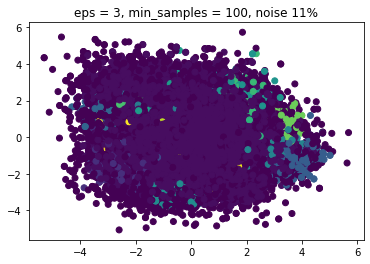

In [ ]:
plt.scatter(x= X_scaled[:,0], y= X_scaled[:,1], c=clustering2.labels_)
plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            3, 100, (100 * np.sum(clustering2.labels_ == -1) / len(X_scaled))))
plt.show()

## German human written text clustering

In [ ]:
X = np.load('/content/drive/MyDrive/data_deu.npy')

In [ ]:
dim = 20
pca = PCA(n_components = dim)
scaler = StandardScaler()
#X_scaled = scaler.fit_transform((np.randomchoices(X, k=50000) #randomly chosen 50.000 vectors for conducting an exepriment in order to choose hyperparametres
X_scaled = scaler.fit_transform(X[:264012])
X_scaled = pca.fit_transform(X_scaled)
X_scaled = scaler.fit_transform(X_scaled)

{('eps:', 3.5, ', min_samples:', 500): 6.484881366176631}


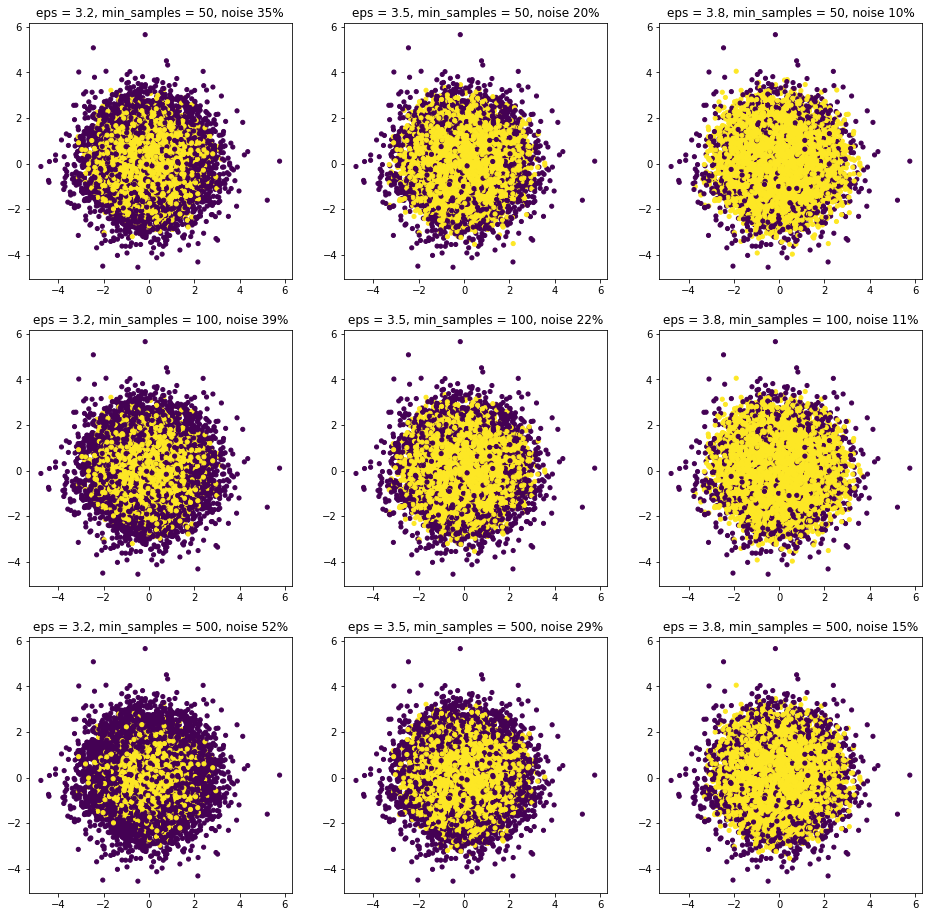

In [ ]:
calinski_score = {}
num_unique_clust = {}
plt.figure(figsize=(16, 16))
i = 1
for min_samples in [50, 100, 500]:
    for eps in [3.2, 3.5, 3.8]:                #other epsilons in range 1-12 were considered as well, but these values have showed the best result
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit(X_scaled)
        plt.subplot(3, 3, i)
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters.labels_, s=15 * (clusters != -1) + 2)
        plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            eps, min_samples, (100 * np.sum(clusters.labels_ == -1) / len(X_scaled))))
        if len(np.unique(clusters.labels_)) > 1: 
          calinski_score ['eps:', eps, ", min_samples:", min_samples] =  metrics.calinski_harabasz_score(X_scaled, clusters.labels_)
          num_unique_clust['eps:', eps, ", min_samples:", min_samples] = len(np.unique(clusters.labels_))
        i += 1
max_val = max(calinski_score.values())
best_param = {k: v for k, v in calinski_score.items() if v == max_val}
print(best_param)
#print(num_unique_clust)
plt.show()

In [ ]:
calinski_score 

{('eps:', 3.2, ', min_samples:', 50): 5.314174220508024,
 ('eps:', 3.2, ', min_samples:', 100): 5.332038982172032,
 ('eps:', 3.2, ', min_samples:', 500): 4.933212761040806,
 ('eps:', 3.5, ', min_samples:', 50): 3.99659188607325,
 ('eps:', 3.5, ', min_samples:', 100): 4.168328070932931,
 ('eps:', 3.5, ', min_samples:', 500): 6.484881366176631,
 ('eps:', 3.8, ', min_samples:', 50): 3.57957693781234,
 ('eps:', 3.8, ', min_samples:', 100): 2.8726592884882756,
 ('eps:', 3.8, ', min_samples:', 500): 3.408518084966546}

In [ ]:
num_unique_clust

{('eps:', 3.2, ', min_samples:', 50): 2,
 ('eps:', 3.2, ', min_samples:', 100): 2,
 ('eps:', 3.2, ', min_samples:', 500): 2,
 ('eps:', 3.5, ', min_samples:', 50): 2,
 ('eps:', 3.5, ', min_samples:', 100): 2,
 ('eps:', 3.5, ', min_samples:', 500): 2,
 ('eps:', 3.8, ', min_samples:', 50): 2,
 ('eps:', 3.8, ', min_samples:', 100): 2,
 ('eps:', 3.8, ', min_samples:', 500): 2}

In [ ]:
calinski_score

{('eps:', 5, ', min_samples:', 10): 3.8547952608842944,
 ('eps:', 5, ', min_samples:', 20): 3.971335355491933,
 ('eps:', 5, ', min_samples:', 50): 3.7327096692108586,
 ('eps:', 5, ', min_samples:', 100): 3.9598764611952744,
 ('eps:', 5, ', min_samples:', 200): 3.355404021371704,
 ('eps:', 5, ', min_samples:', 500): 3.7581326483293607,
 ('eps:', 5, ', min_samples:', 1000): 4.059367013420397,
 ('eps:', 5, ', min_samples:', 2000): 4.617155988112862,
 ('eps:', 5, ', min_samples:', 5000): 5.6136561135254395}

{('eps:', 3.5, ', min_samples:', 7): 8.503852031156375,
 ('eps:', 3.5, ', min_samples:', 8): 5.464607472046086,
 ('eps:', 3.5, ', min_samples:', 9): 2.437710858340609,
 ('eps:', 3.8, ', min_samples:', 7): 11.2938962339478,
 ('eps:', 3.8, ', min_samples:', 8): 10.042996371526607,
 ('eps:', 3.8, ', min_samples:', 9): 3.9224175356948385,
 ('eps:', 4, ', min_samples:', 7): 3.2707624644418805,
 ('eps:', 4, ', min_samples:', 8): 3.125161702889046,
 ('eps:', 4, ', min_samples:', 9): 3.20627007681291}

 {('eps:', 5, ', min_samples:', 50): 5.90522561333552,
 ('eps:', 5, ', min_samples:', 100): 6.091349712146146,
 ('eps:', 5, ', min_samples:', 200): 5.471189477093652,
 ('eps:', 5.5, ', min_samples:', 50): 7.152974034275543,
 ('eps:', 5.5, ', min_samples:', 100): 7.017164242645995,
 ('eps:', 5.5, ', min_samples:', 200): 7.139713623880081,
 ('eps:', 6, ', min_samples:', 50): 10.250482859090289,
 ('eps:', 6, ', min_samples:', 100): 10.189679972158448,
 ('eps:', 6, ', min_samples:', 200): 10.189679972158448}

{('eps:', 7, ', min_samples:', 500): 9.63825062090673}


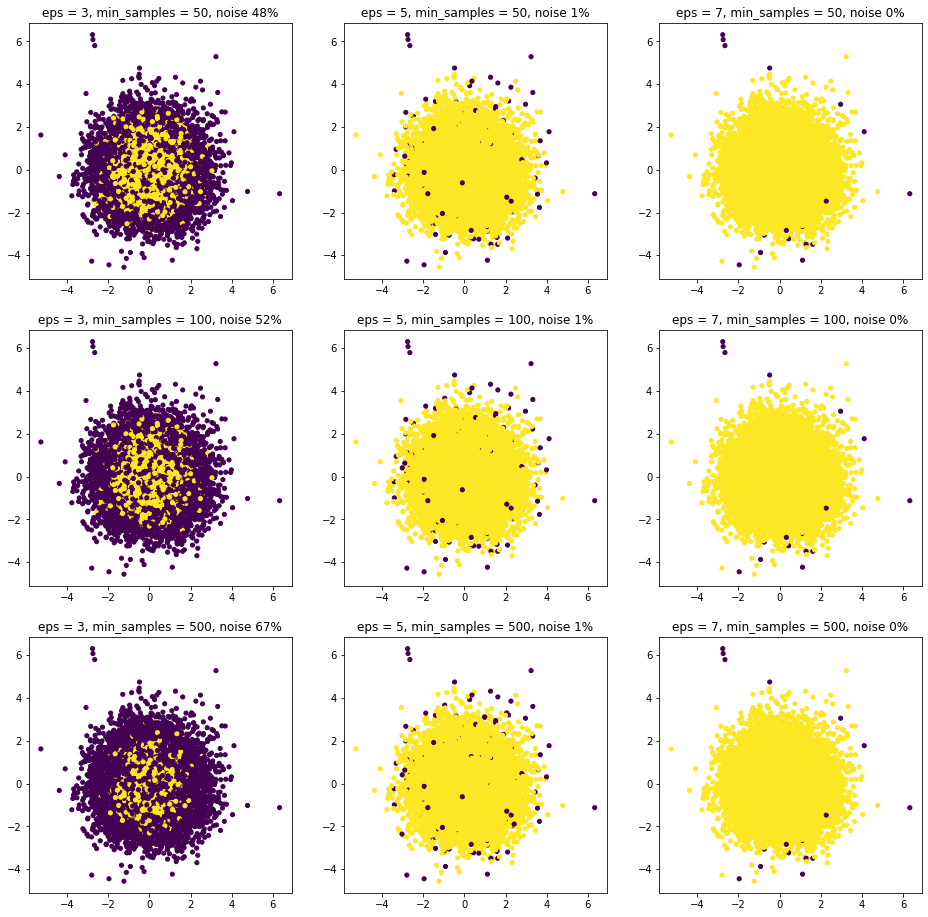

In [ ]:
calinski_score = {}
num_unique_clust = {}
plt.figure(figsize=(16, 16))
i = 1
for min_samples in [50, 100, 500]:
    for eps in [3, 5, 7]:                #other epsilons in range 1-12 were considered as well, but these values have showed the best result
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit(X_scaled)
        plt.subplot(3, 3, i)
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters.labels_, s=15 * (clusters != -1) + 2)
        plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            eps, min_samples, (100 * np.sum(clusters.labels_ == -1) / len(X_scaled))))
        if len(np.unique(clusters.labels_)) > 1: 
          calinski_score ['eps:', eps, ", min_samples:", min_samples] =  metrics.calinski_harabasz_score(X_scaled, clusters.labels_)
          num_unique_clust['eps:', eps, ", min_samples:", min_samples] = len(np.unique(clusters.labels_))
        i += 1
max_val = max(calinski_score.values())
best_param = {k: v for k, v in calinski_score.items() if v == max_val}
print(best_param)
#print(num_unique_clust)
plt.show()

In [ ]:
calinski_score

{('eps:', 3, ', min_samples:', 50): 3.0231657752184495,
 ('eps:', 3, ', min_samples:', 100): 3.260470013320899,
 ('eps:', 3, ', min_samples:', 500): 3.592775003458268,
 ('eps:', 5, ', min_samples:', 50): 8.03494414402556,
 ('eps:', 5, ', min_samples:', 100): 7.618647828120119,
 ('eps:', 5, ', min_samples:', 500): 8.052568345757724,
 ('eps:', 7, ', min_samples:', 50): 8.984514242394354,
 ('eps:', 7, ', min_samples:', 100): 8.984514242394354,
 ('eps:', 7, ', min_samples:', 500): 9.63825062090673}

In [ ]:
dbscan3 = DBSCAN(eps=3.5, min_samples=100, metric='euclidean')
clustering3 = dbscan3.fit(X_scaled)
with open('/content/drive/MyDrive/deu_labels.npy', 'wb') as f:
        np.save(f, clustering3.labels_)
print("Number of clusters =", len(np.unique(clustering3.labels_)))

Number of clusters = 2


In [ ]:
print('Calinski-Harabasz score for the whole dataset =', metrics.calinski_harabasz_score(X_scaled, clustering3.labels_))

Calinski-Harabasz score for the whole dataset = 11.574091286124549


In [ ]:
print('DB score for the whole dataset =', metrics.davies_bouldin_score(X_scaled, clustering3.labels_))

DB score for the whole dataset = 96.2177153754299


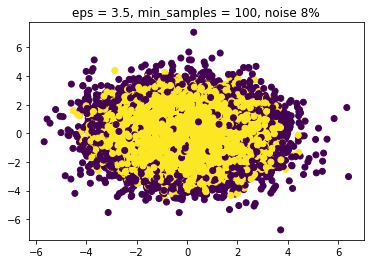

In [ ]:
plt.scatter(x= X_scaled[:,0], y= X_scaled[:,1], c=clustering3.labels_)
plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            3.5, 100, (100 * np.sum(clustering3.labels_ == -1) / len(X_scaled))))
plt.show()

## German bot written text clustering

In [ ]:
X = np.load('/content/drive/MyDrive/Dataset/data_bot_deu.npy')

In [ ]:
dim = 20
pca = PCA(n_components = dim)
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(random.choices(X, k=50000)) #randomly chosen 50.000 vectors for conducting an exepriment in order to choose hyperparametres
X_scaled = scaler.fit_transform(X)
X_scaled = pca.fit_transform(X_scaled)
X_scaled = scaler.fit_transform(X_scaled)

{('eps:', 3.5, ', min_samples:', 100): 114.91473650473456}


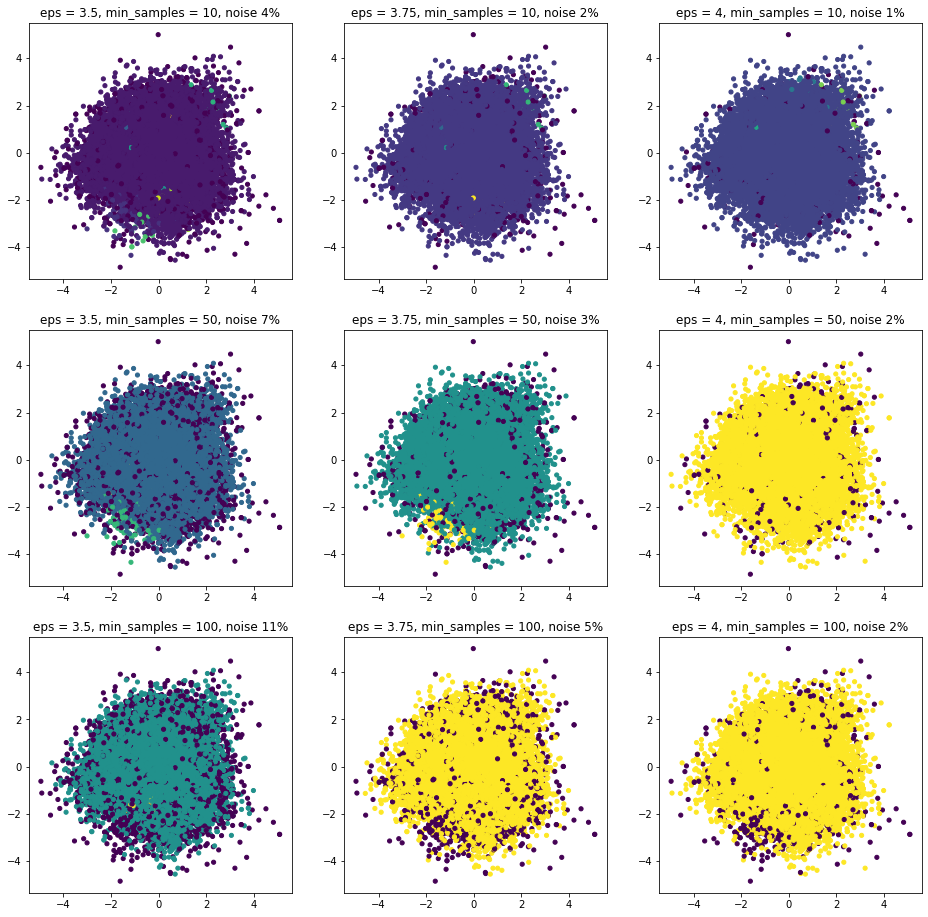

In [ ]:
calinski_score = {}
num_unique_clust = {}
plt.figure(figsize=(16, 16))
i = 1
for min_samples in [10, 50, 100]:
    for eps in [3.5, 3.75, 4]:                
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit(X_scaled)
        plt.subplot(3, 3, i)
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters.labels_, s=15 * (clusters != -1) + 2)
        plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            eps, min_samples, (100 * np.sum(clusters.labels_ == -1) / len(X_scaled))))
        if len(np.unique(clusters.labels_)) > 1: 
          calinski_score ['eps:', eps, ", min_samples:", min_samples] =  metrics.calinski_harabasz_score(X_scaled, clusters.labels_)
          num_unique_clust['eps:', eps, ", min_samples:", min_samples] = len(np.unique(clusters.labels_))
        i += 1
max_val = max(calinski_score.values())
best_param = {k: v for k, v in calinski_score.items() if v == max_val}
print(best_param)
#print(num_unique_clust)
plt.show()

{('eps:', 3.5, ', min_samples:', 10): 31.85013847747858,
 ('eps:', 3.5, ', min_samples:', 50): 25.148998318949587,
 ('eps:', 3.5, ', min_samples:', 100): 48.849248991501504,
 ('eps:', 3.75, ', min_samples:', 10): 42.216883489133885,
 ('eps:', 3.75, ', min_samples:', 50): 24.299364613435166,
 ('eps:', 3.75, ', min_samples:', 100): 90.81910007120794,
 ('eps:', 4, ', min_samples:', 10): 50.08156017930658,
 ('eps:', 4, ', min_samples:', 50): 77.7498951183471,
 ('eps:', 4, ', min_samples:', 100): 32.340895756400144}

In [ ]:
calinski_score 

{('eps:', 3.5, ', min_samples:', 10): 46.303223538953276,
 ('eps:', 3.5, ', min_samples:', 50): 95.8082406925906,
 ('eps:', 3.5, ', min_samples:', 100): 114.91473650473456,
 ('eps:', 3.75, ', min_samples:', 10): 44.59635071887455,
 ('eps:', 3.75, ', min_samples:', 50): 107.72392581287305,
 ('eps:', 3.75, ', min_samples:', 100): 51.55949509475573,
 ('eps:', 4, ', min_samples:', 10): 41.78300645020971,
 ('eps:', 4, ', min_samples:', 50): 27.945339716751825,
 ('eps:', 4, ', min_samples:', 100): 40.508847157523164}

In [ ]:
dbscan4 = DBSCAN(eps=3.35, min_samples=100, metric='euclidean')
clustering4 = dbscan4.fit(X_scaled)
with open('/content/drive/MyDrive/Dataset/deu_bot_labels.npy', 'wb') as f:
        np.save(f, clustering4.labels_)
print("Number of clusters =", len(np.unique(clustering4.labels_)))

Number of clusters = 8


In [ ]:
print('Calinski-Harabasz score for the whole dataset =', metrics.calinski_harabasz_score(X_scaled, clustering4.labels_))

Calinski-Harabasz score for the whole dataset = 432.5130820646178


In [ ]:
print('DB score for the whole dataset =', metrics.davies_bouldin_score(X_scaled, clustering4.labels_))

DB score for the whole dataset = 6.449409345703768


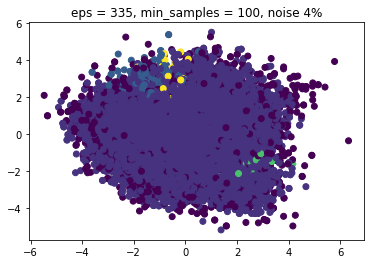

In [ ]:
plt.scatter(x= X_scaled[:,0], y= X_scaled[:,1], c=clustering4.labels_)
plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            335, 100, (100 * np.sum(clustering4.labels_ == -1) / len(X_scaled))))
plt.show()

In [ ]:
aa = np.load('/content/drive/MyDrive/Dataset/deu_bot_labelsTEST.npy')

In [ ]:
len(aa)

302647

In [ ]:
np.unique(aa)

array([-1,  0,  1,  2,  3,  4,  5,  6])